# Postwork 8

**Introducción a Machine Learning: Clasificación No Supervisada y Supervisada**

*REQUISITO:* Tener un dataset limpio que contenga una variable dependiente binaria. En caso de que tu dataset no contenga una variable dependiente binaria, date una vuelta por Kaggle y busca algún dataset apropiado.

Realiza los siguientes pasos:
- Entrena un modelo de Regresión Logística con tu dataset.
- Evalúa tu modelo de Regresión Logística utilizando matriz de confusión; medidas de precisión, exactitud, sensibilidad y especificidad; y curva ROC/AUC.


Tomamos un dataset de kaggle [Patient Survival After One Year of Treatment](https://www.kaggle.com/datasets/rsrishav/patient-survival-after-one-year-of-treatment) para predecir la supervivencia de un paciente después de un año de tratamiento. Según la descripción, un hospital de Groenlandia quiere identificar los principales factores que conducen a la falta de supervivencia. 

In [ ]:
import pandas as pd

In [ ]:
# Activamos la unidad de almacenamiento de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#leemos los datasets que previamente han sido descargados y subidos a Google Drive
df1 = pd.read_csv('/content/drive/MyDrive/Testing_set_advance.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Testing_set_intermediate.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Training_set_advance.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Training_set_intermediate.csv')

Si bien los datos vienen divididos, los úniremos para posteriormente dividirlos en conjuntos de entrenamiento y prueba de manera alaetoria

In [ ]:
df = pd.concat([df1,df2,df3,df4], ignore_index=True)
df.head(3)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,NaN
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,NaN
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [ ]:
df.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

**Descripción de las columnas**

- *ID_Patient_Care_Situation*: es un código que representa la situación de cuidados de un paciente durante el tratamiento.

- *Diagnosed_Condition*: Un código que representa el diagnóstico del paciente.

- *Patient_ID*: Identificación del paciente.

- *Treated_with_drugs*: Clase de fármacos utilizados en el tratamiento.

- *Patient_Age*: Edad del paciente.

- *Patient_Body_Mass_Index*: Índice de Masa Corporal (función del peso y la estatura) del paciente.

- *Patient_Smoker*: Si el paciente era fumador o no.

- *Patient_Rural_Urban*: Si el paciente vive en una región rural o urbana del país.

- *Patient_mental_condition*: Breve descripción de la condición mental del paciente.

- *A*, *B*, *C*, *D*, *E*, *F*, *Z*: En conjunto describen la condición del paciente antes de iniciar el tratamiento. El valor 0 indica que el paciente no presentaba la condición, 1 que sí la presentaba. El número de padecimientos se suma en la columna *Number_of_prev_cond*.

- *Survived_1_year*: El valor 0 implica que el paciente no sobrevivió después de un año de tratamiento, mientras que el 1 indica que sí sobrevivió.

Entonces utilizaremos las columnas Diagnosed_Condition, Patient_Age, Patient_Body_Mass_Index y Number_of_prev_cond para clasificar los pacientes entre los que sí sobrevivieron un año o no.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66809 entries, 0 to 66808
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  66809 non-null  int64  
 1   Diagnosed_Condition        66809 non-null  int64  
 2   Patient_ID                 66809 non-null  int64  
 3   Treated_with_drugs         66788 non-null  object 
 4   Patient_Age                66809 non-null  int64  
 5   Patient_Body_Mass_Index    66809 non-null  float64
 6   Patient_Smoker             66809 non-null  object 
 7   Patient_Rural_Urban        66809 non-null  object 
 8   Patient_mental_condition   66809 non-null  object 
 9   A                          64218 non-null  float64
 10  B                          64218 non-null  float64
 11  C                          64218 non-null  float64
 12  D                          64218 non-null  float64
 13  E                          64218 non-null  flo

Dando una revisión rápida a los datos vemos que hay algunos datos faltantes en una de las columnas de interés, por practicidad, eliminaremos los registros con datos faltantes.

In [ ]:
df = df.dropna(axis=0)
df.isna().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

Ahora entrenamos un modelo de regresión logística

In [ ]:
#seleccionamos las variables de interés
X = df[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']]
y = df['Survived_1_year']

In [ ]:
#importamos librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#particionamos los datos ocupando el 70% para entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# creamos el modelo
logreg = LogisticRegression(max_iter=1000000)

In [ ]:
# ajustamos el modelo de regresión
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

In [ ]:
#realizamos predicciones con el conjunto de prueba
y_pred = logreg.predict(X_test)

Procedemos a evaluar el modelo creado

In [ ]:
from sklearn import metrics

Matriz de confusión

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

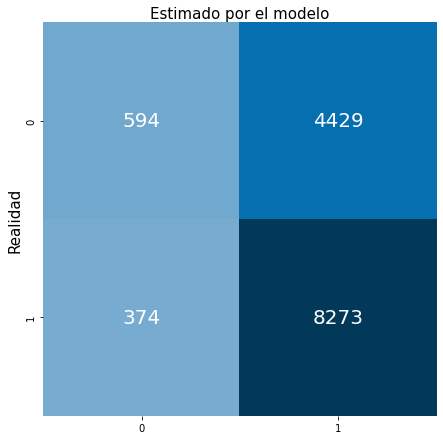

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu",
            center=500,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Vemos que nuestro modelo produce bastantes falsos positivos (4429) pero casi el doble de verdaderos positivos (8273). Mientras que la clasificación de los negativos es bastante equitativo entre verdaderos y falsos negativos.
También consideremos que tenemos más datos con la etiqueta 1 que 0.

In [ ]:
df.groupby('Survived_1_year').size()

Survived_1_year
0.0    17077
1.0    28487
dtype: int64

Calculamos las medidas de evaluación

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.6513147535821131
Exactitud: 0.648646671543526
Sensibilidad: 0.95674800508847
Especificidad: 0.11825602229743182


El modelo no es muy bueno como lo intuíamos con la matriz de confusión, sólo el 65% de las clasificaciones positivas que se realizaron eran en verdad positivas. Sólo el 64% de las clasificaciones realizadas fueron correctas. Y solo el 11% de las clasificaciones negativas que había en realidad se clasificaron correctamente como negativas. Sin embargo, el 95% de las clasificaciones positivas verdaderas que había se clasificaron correctamente.

Ahora graficamos la curva ROC/AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
#obtenemos los resultados probabilísticos del modelo
y_pred_proba = logreg.predict_proba(X_test)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

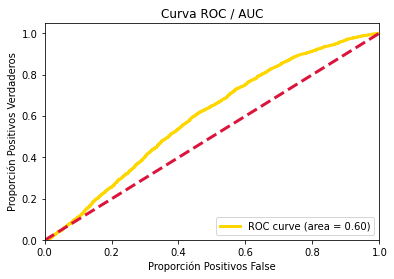

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='gold',
         label='ROC curve (area = %0.2f)' % roc_auc,linewidth=3)
plt.plot([0, 1], [0, 1], color='crimson', linestyle='--',linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

El valor cercano a 0.5 significa que el modelo no puede diferenciar entre positivos y negativos. Esto puede atribuirse a varias causas como, la elección de las variables independientes, pudimos haber utilizado más o menos variables, que la información no sea suficiente o simplemente que un modelo de regresión logística no sea el más apropiado para este problema.